### For an LambdaCDM Universe calculatiton of the a(t) vs t

$\frac{H^{2}}{H_{0}^{2}}=\frac{\Omega_{rad,0}}{a^{4}}+\frac{\Omega_{m,0}}{a^{3}}+\frac{1-\Omega_{m,0}-\Omega_{\Lambda,0}-\Omega_{r,0}-\Omega_{c,0}}{a^{2}}+\Omega_{\Lambda,0}+\frac{\Omega_{c}}{a^{2}}$ (Friedman Equation)

$\Omega_{c,0}$ omega para el compuesto dark curvature

$H_{0}=67.810 \; km/s/Mpc$

In [1]:
## Constants
H = 67.810 ## Hubble Constant = 71 km/s/Mpc
Mpc = 3.085677581e+19 #kms
km = 1.0
Gyr= 3.1536e16 #seconds
H0 = (H * Gyr * km / Mpc)

In [2]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

In [3]:
#definición del metodo del trapecio
#def trapezoid(x, fx): 
#    eq = 0
#    for i in range(len(x)-1):
#        eq = eq + (((x[i-1]-x[i])*(fx[i]+fx[i+1]))/2.)
#    return eq/H0

### $\Omega=\Omega_{M}+\Omega_{R}+\Omega_{L}+\Omega_{c}$
### $t*H_{0} = \frac{1}{\sqrt{\frac{\Omega_{R}}{a^{2}}+\frac{\Omega_{M}}{a}+\frac{\Omega_{\Lambda}}{a^{2}}+(1-\Omega)+\Omega_{c}}}$

In [4]:
# definimos la funcion para uni=t*H_{0}

def universe(a, omegaM, omegaR, omegaL, omegaC):
    omega = omegaM + omegaR + omegaL+ omegaC
    uni =1./np.sqrt( (omegaR/(a**2.)) + omegaM/a + omegaL*(a**2.) + omegaC) 
    return uni

## Lambda Class y No Class para diferentes $\Omega_{c}$

Lambda: 0.6999090385434282 Matter:  0.30009096145657177 Omega_k:  0.0
Lambda: 0.2999090385434282 Matter:  0.30009096145657177 Omega_k:  0.4
Lambda: -0.30009096145657166 Matter:  0.30009096145657166 Omega_k:  1


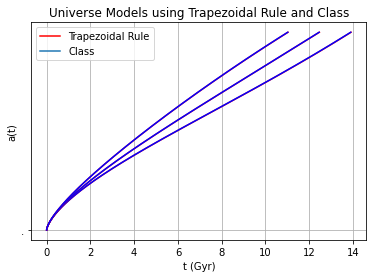

In [7]:
darkcurvature = [0.0,0.4,1] # distintos valores para Omega_{c}

for k in darkcurvature: 
    
    NOSteps = 3000
    begin = 1.e-5
    end = 1
    StepSize = (end - begin) / NOSteps
    at = np.arange(begin, end + StepSize, StepSize) 
    concordance_time = [0] 
    concordance_partresult = 0
    

    LCDM = Class()
    LCDM.set({'Omega_cfld':k,'Omega_cdm':0.25,'Omega_b': 0.05})
    LCDM.compute()
    
    derived = LCDM.get_current_derived_parameters(['Omega0_lambda'])
    print('Lambda:', derived["Omega0_lambda"],'Matter: ', 1-(derived["Omega0_lambda"]+k),'Omega_k: ',k)

    baLCDM = LCDM.get_background() # Obtenemos los valores del background para CDM

    c = []
    d = baLCDM['z']

    for i in range(0,3000): 
        c.append(1/(baLCDM['z'][i]+1))
    
    for i in range(1, NOSteps+1):
        concordance_y0 = universe(at[i], 0.30009096145657177, 0.0, derived["Omega0_lambda"], k)
        concordance_y1 = universe(at[i-1], 0.30009096145657177, 0.0, derived["Omega0_lambda"], k)
        concordance_partresult += StepSize * (concordance_y0 + concordance_y1)/2. 
        concordance_time.append(concordance_partresult / H0)
    
    #print('Lambda=',1-(k+0.31214877038733924))
    plt.plot(concordance_time, at, 'red', '.') 


    plt.plot(baLCDM['proper time [Gyr]'],c, 'blue')


plt.title('Universe Models using Trapezoidal Rule and Class')
plt.xlabel('t (Gyr)')
plt.ylabel('a(t)') 
plt.legend(['Trapezoidal Rule','Class'])
#plt.legend(['Concordance','Loitering','EdS','Lambda Collapse']) 
plt.grid(True)
plt.show()